## 4.8. Ozellik Muhendisligi 2 - Odev

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [44]:
# Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz.
# Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. 
# Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

states = pd.read_csv('states_all.csv')
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [45]:
# hangi sutunlarda eksik veri olduguna bakalim

states.isnull().sum()/states.shape[0]*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [46]:
# tum sutunlardaki eksik degerleri, o sutunun ortalamasi ile dolduralim

na_list = ['ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
           'GRADES_PK_G', 'GRADES_KG_G','GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G',
           'GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
for col in na_list:
    states.loc[:, col].fillna(states.loc[:, col].mean(), inplace=True)

In [47]:
# Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin 
# sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

states['Average_Score'] = ((states['GRADES_4_G']* ((states['AVG_MATH_4_SCORE']) + states['AVG_READING_4_SCORE'])*0.5)+ (states['GRADES_8_G']* ((states['AVG_MATH_8_SCORE']) + states['AVG_READING_8_SCORE'])*0.5))/(states['GRADES_4_G'] + states['GRADES_8_G'])

In [48]:
# Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? 
# Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [49]:
# ihtiyacimiz olmayan sutunlari cikaralim

states.drop(columns=['PRIMARY_KEY','STATE','YEAR','ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 
                     'LOCAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G', 'GRADES_KG_G','GRADES_4_G',
                     'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G',
                     'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE',
                     'AVG_READING_8_SCORE'], inplace=True)

In [50]:
states.head()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,Average_Score
0,1481703.0,735036.0,429950.933824,174053.0,232.656371
1,498362.0,350902.0,429950.933824,37451.0,248.121841
2,1435908.0,1007732.0,429950.933824,609114.0,236.551000
3,964323.0,483488.0,429950.933824,145212.0,235.620663
4,14358922.0,8520926.0,429950.933824,2044688.0,231.620173


In [51]:
states_k = states.corr()

Text(0.5, 1.0, 'Egitim Korelasyon')

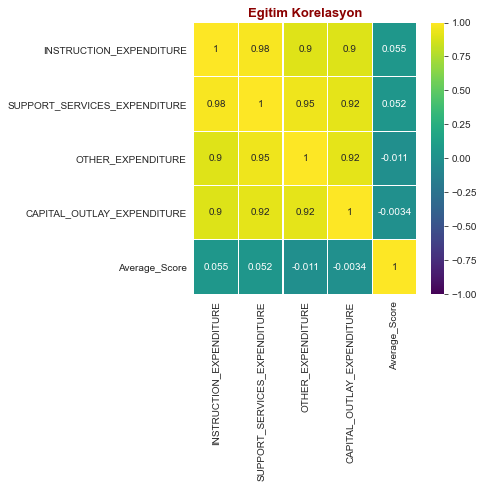

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(states_k, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Egitim Korelasyon", fontdict = baslik_font)

In [53]:
# 4 harcama kaleminin de genel not ortalamasina gore korrelasyonu cok dusuk. Uncorrelated diyebiliriz

In [54]:
# Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! 
# Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [55]:
A = StandardScaler().fit_transform(states)
pca = PCA(n_components=5)
principalComponents=pca.fit_transform(A)

In [56]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.75584236 0.20067676 0.02391543 0.01658747 0.00297797]
[ 75.58  95.65  98.04  99.7  100.  ]


In [57]:
# Ilk bilesen toplam varyansin %76 sini aciklayabilmektedir

In [ ]:
# Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

# Bu soruda yardimci olur musunuz?

In [ ]:
# Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, 
# harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?